## Purpose of analysis:
* Build moving average of varios stocks 
* Determine correlations between stock returns 
* Create an optimal portfolio
* Try to predict the future behavior of the stocks 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime

In [2]:
# Setting the begining and ending
today = datetime.now()
year_ago = datetime(today.year-1, today.month, today.day)

In [3]:
# Four company for data extraction
company_list = ['TWTR', 'TSLA', 'MSFT', 'AMZN']

In [4]:
#globals()- taking the string and makes it a global variable
for company in company_list:
    globals()[company] = data.DataReader(company, 'yahoo', year_ago, today)

In [5]:
TWTR.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-08,59.599998,57.380001,57.799999,58.200001,18285200,58.200001
2021-02-09,60.730000,58.549999,58.639999,59.869999,38253800,59.869999
2021-02-10,69.250000,63.200001,65.800003,67.769997,73649200,67.769997
2021-02-11,69.019997,66.580002,67.989998,68.559998,30470000,68.559998
2021-02-12,73.180000,68.400002,68.559998,71.900002,38044200,71.900002


In [6]:
TSLA.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-08,877.770020,854.750000,869.669983,863.419983,20161700,863.419983
2021-02-09,859.799988,841.750000,855.119995,849.460022,15157700,849.460022
2021-02-10,844.820007,800.020020,843.640015,804.820007,36216100,804.820007
2021-02-11,829.880005,801.729980,812.440002,811.659973,21622800,811.659973
2021-02-12,817.330017,785.330017,801.260010,816.119995,23768300,816.119995


In [7]:
MSFT.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-08,243.679993,240.809998,243.149994,242.470001,22211900.0,240.454437
2021-02-09,244.759995,241.380005,241.869995,243.770004,23565000.0,241.743637
2021-02-10,245.919998,240.889999,245.000000,242.820007,22186700.0,240.801529
2021-02-11,245.149994,242.149994,244.779999,244.490005,15751100.0,242.457657
2021-02-12,245.300003,242.729996,243.929993,244.990005,16561100.0,242.953491


In [8]:
AMZN.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-08,3365.000000,3304.000000,3358.50000,3322.939941,3257400,3322.939941
2021-02-09,3338.000000,3297.840088,3312.48999,3305.000000,2203500,3305.000000
2021-02-10,3317.949951,3254.000000,3314.00000,3286.580078,3151600,3286.580078
2021-02-11,3292.000000,3248.060059,3292.00000,3262.129883,2301400,3262.129883
2021-02-12,3280.250000,3233.310059,3250.00000,3277.709961,2335300,3277.709961


In [9]:
TWTR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-02-08 to 2022-02-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    int64  
 5   Adj Close  254 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


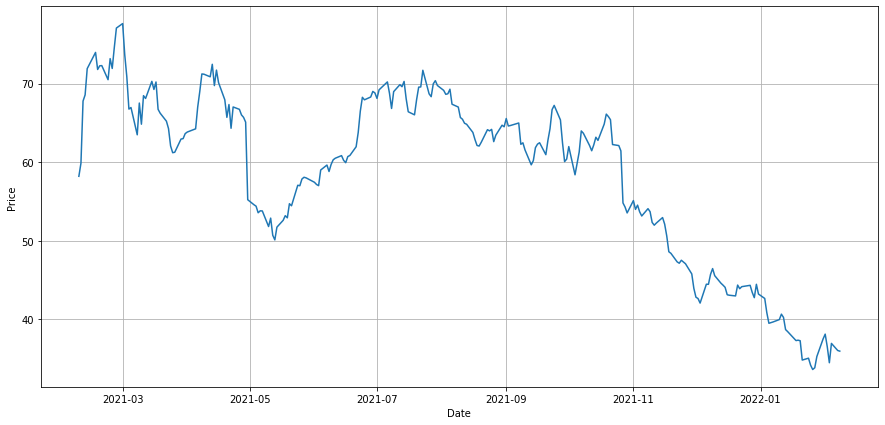

In [10]:
plt.figure(figsize=(15, 7))
plt.plot(TWTR['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

<AxesSubplot:xlabel='Date'>

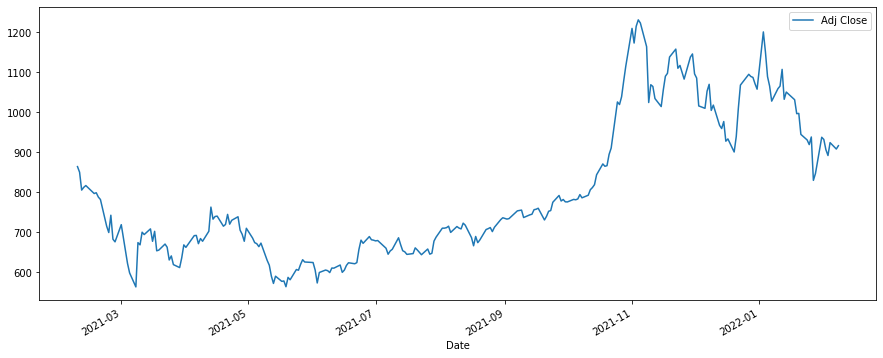

In [11]:
TSLA['Adj Close'].plot(legend=True, figsize=(15, 6))

## Moving average

Moving average - function whose value at each point is equal to some average value of the original function for the previous period. 

Formula for calculations:

SUM = sum of prices for past x days; MA = SUM / x 

In [12]:
MA_days = [10, 20, 30]

for ma in MA_days:
    ma_str = "MA: {}".format(ma)
    TWTR[ma_str] = TWTR['Adj Close'].rolling(ma).mean()
    TSLA[ma_str] = TSLA['Adj Close'].rolling(ma).mean()
    MSFT[ma_str] = MSFT['Adj Close'].rolling(ma).mean()
    AMZN[ma_str] = AMZN['Adj Close'].rolling(ma).mean()

In [13]:
TWTR.head()

,High,Low,Open,Close,Volume,Adj Close,MA: 10,MA: 20,MA: 30
Date,,,,,,,,,
2021-02-08,59.599998,57.380001,57.799999,58.200001,18285200,58.200001,NaN,NaN,NaN
2021-02-09,60.730000,58.549999,58.639999,59.869999,38253800,59.869999,NaN,NaN,NaN
2021-02-10,69.250000,63.200001,65.800003,67.769997,73649200,67.769997,NaN,NaN,NaN
2021-02-11,69.019997,66.580002,67.989998,68.559998,30470000,68.559998,NaN,NaN,NaN
2021-02-12,73.180000,68.400002,68.559998,71.900002,38044200,71.900002,NaN,NaN,NaN


In [14]:
def plot_graphic(company, company_string):
    plt.figure(figsize=(15, 6))
    plt.plot(company['Adj Close'])
    plt.plot(company['MA: 10'])
    plt.plot(company['MA: 20'])
    plt.plot(company['MA: 30'])
    
    plt.title(company_string)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(('Adj Close','MA: 10', 'MA: 20', 'MA:30'))
    plt.grid()
    plt.show()

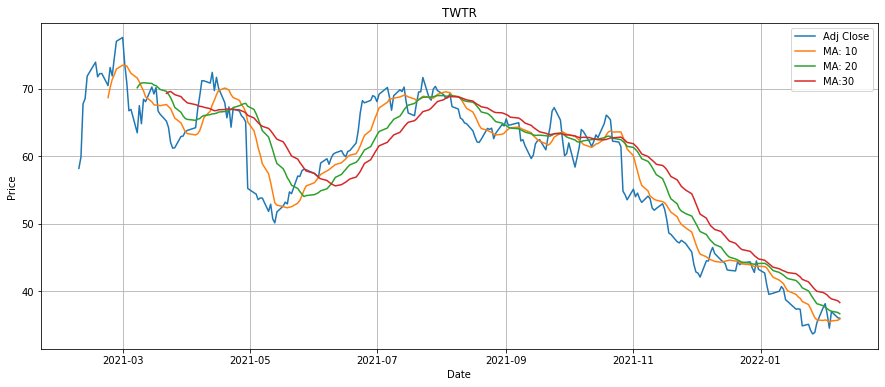

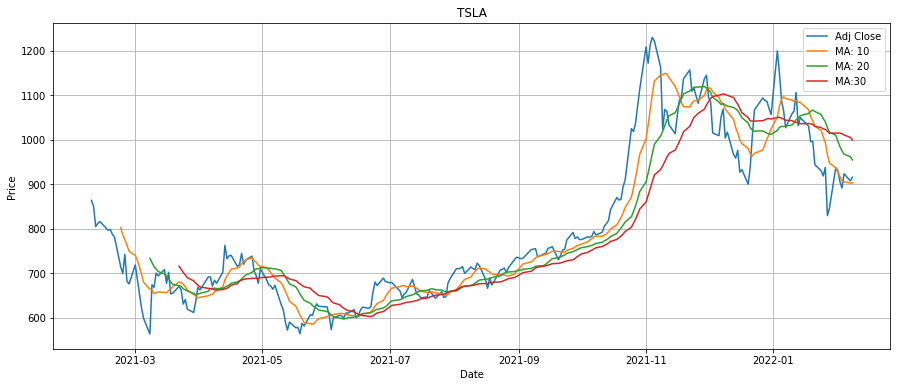

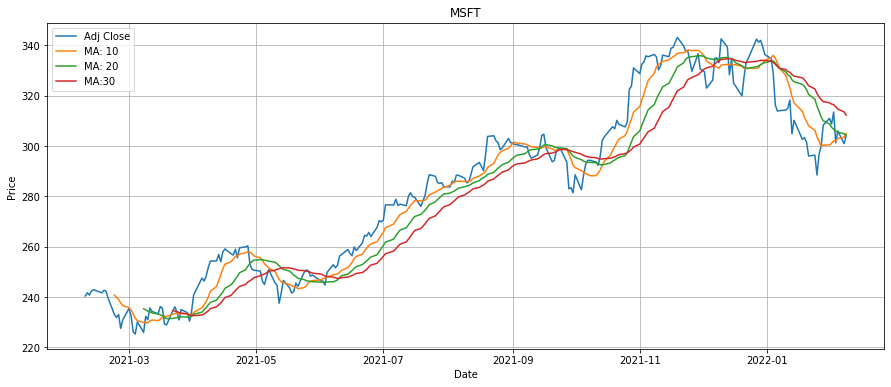

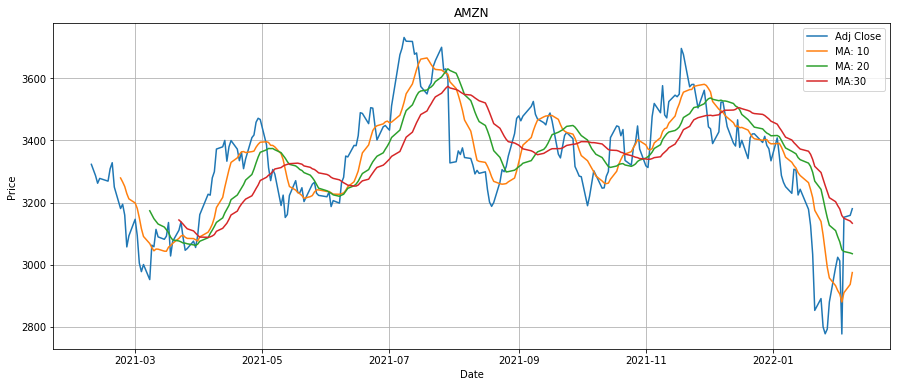

In [15]:
data_list = [TWTR, TSLA, MSFT, AMZN]

for i in range(len(data_list)):   
    plot_graphic(data_list[i], company_list[i])

If a long-term investment is being considered, then it is better to consider a smoother curve, since it is more resistant to sharp price jumps.

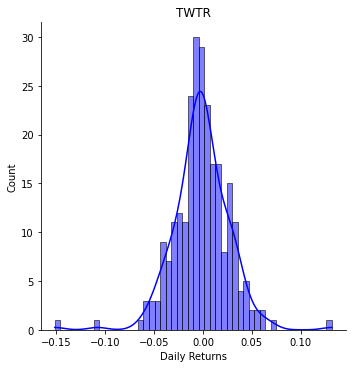

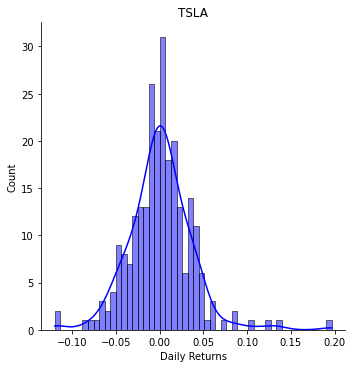

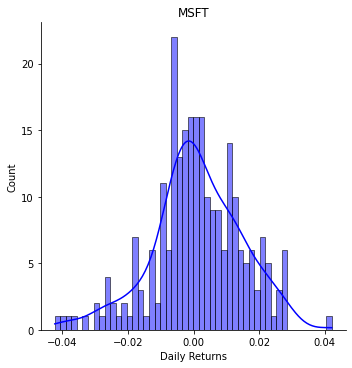

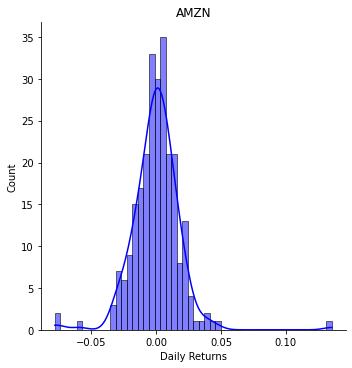

In [16]:
# Calculate returns and draw distribution

for i in range(len(data_list)):
    data_list[i]['Daily Returns'] = data_list[i]['Adj Close'].pct_change()
    sns.displot(data_list[i]['Daily Returns'].dropna(), bins=50, color='blue', kde=True)
    plt.title(company_list[i])
    plt.show()

## Correlation between stock returns

In [17]:
# Create dataframe with stock returns
stock_returns = pd.DataFrame(data=np.array([data['Daily Returns'] for data in data_list]).T, columns=company_list)
stock_returns.head()

,TWTR,TSLA,MSFT,AMZN
0,NaN,NaN,NaN,NaN
1,0.028694,-0.016168,0.005362,-0.005399
2,0.131953,-0.052551,-0.003897,-0.005573
3,0.011657,0.008499,0.006878,-0.007439
4,0.048717,0.005495,0.002045,0.004776


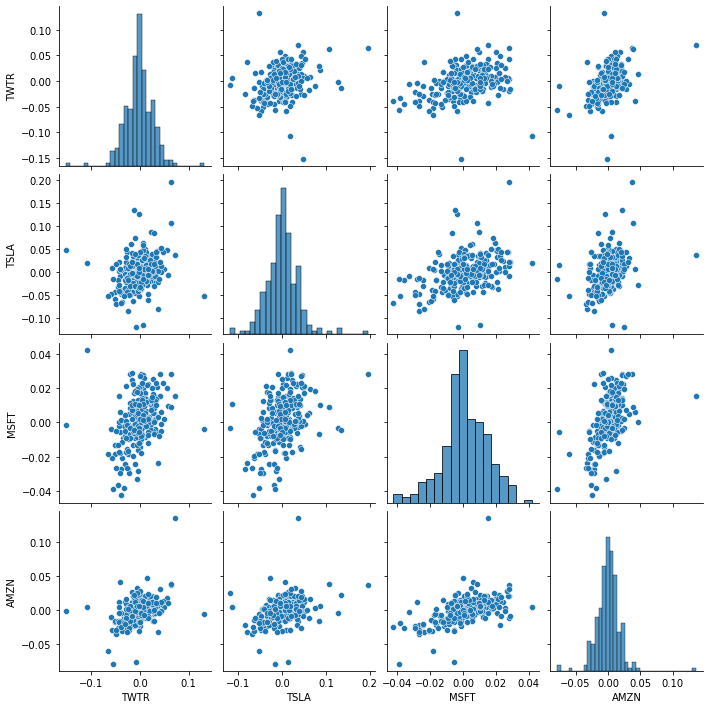

In [18]:
sns.pairplot(stock_returns.dropna())

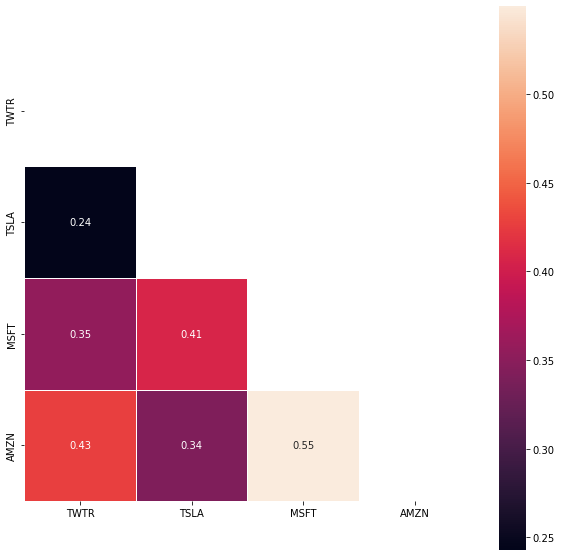

In [19]:
# Build correlation matrix
corr = stock_returns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

In [20]:
def draw_jointplot(data):
    grid = sns.PairGrid(data.dropna())
    grid.map_diag(sns.histplot, bins=40, kde=True)
    grid.map_lower(sns.regplot)
    grid.map_upper(sns.kdeplot)

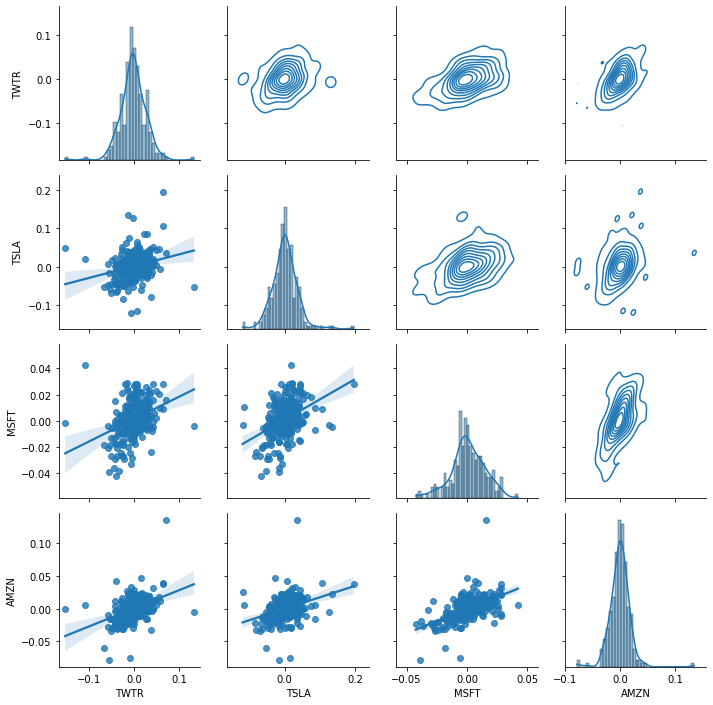

In [21]:
draw_jointplot(stock_returns)

From graphics we have see positive correlation, but it is within [0.24, 0.55]. Amazon and Microsoft have the most correlated daily profits. Tesla and Twitter have the lowest correlation. 

## Portfolio strategy

Let's try to make an optimal portfolio of four stocks. Following the classical theory, it is necessary to minimize risk and maximize profitability. We will generate random ratios of stocks, calculate the risk and profitability of each portfolio according to the given formulas.

The expected return of the portfolio is the total expected return of the securities included in it, weighted taking into account their share in the portfolio. 

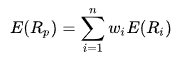

The basic formula for calculating risk is based on the relationship between the shares in the portfolio and the covariance associated with each of the securities in the portfolio.

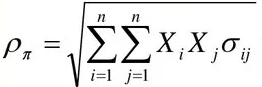

In [22]:
mean_income = stock_returns.mean() # Mean income for each stock
cov_returns = stock_returns.cov() # Covariation 
count = len(stock_returns.columns)
print(mean_income, cov_returns, sep='\n')

TWTR   -0.001500
TSLA    0.000874
MSFT    0.001021
AMZN   -0.000006
dtype: float64
          TWTR      TSLA      MSFT      AMZN
TWTR  0.000800  0.000248  0.000137  0.000223
TSLA  0.000248  0.001307  0.000201  0.000228
MSFT  0.000137  0.000201  0.000187  0.000139
AMZN  0.000223  0.000228  0.000139  0.000340


In [23]:
# Function, that generate random shares
def randomPortfolio():
    share = np.exp(np.random.randn(count))
    share = share / share.sum()
    return share

In [24]:
def IncomePortfolio(Rand):
    return np.matmul(mean_income.values, Rand)


def RiskPortfolio(Rand):
    return np.sqrt(np.matmul(np.matmul(Rand, cov_returns.values), Rand))

In [25]:
combinations = 4000
risk = np.zeros(combinations)
income = np.zeros(combinations)
portfolio = np.zeros((combinations, count))

# Function, which create new combinations of shares
for i in range(combinations):
    rand = randomPortfolio()

    portfolio[i, :] = rand
    risk[i] = RiskPortfolio(rand)
    income[i] = IncomePortfolio(rand)

The Sharpe ratio is the ratio of return to risk.

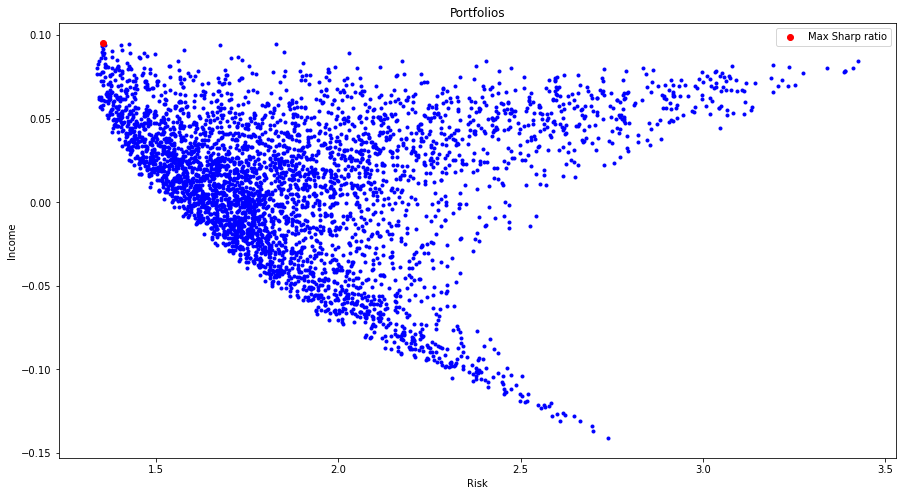

In [26]:
plt.figure(figsize=(15, 8))

plt.scatter(risk * 100, income * 100, c="b", marker=".")
plt.xlabel("Risk")
plt.ylabel("Income")
plt.title("Portfolios")
MaxSharpRatio = np.argmax(income / risk)
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio")

plt.legend()
plt.show()

In [27]:
best_port = portfolio[MaxSharpRatio]
for i in range(len(company_list)):
    print("{} : {}".format(company_list[i], best_port[i]))

TWTR : 0.014778230057373944
TSLA : 0.0022693753037808504
MSFT : 0.9554197275086644
AMZN : 0.027532667130180606


## Try to predict price behavior with method Monte Carlo

In [28]:
days = 365
dt = 1 / days
stock_returns.dropna(inplace=True)

mu = stock_returns.mean()
sigma = stock_returns.std()

In [29]:
def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

### Twitter

In [30]:
TWTR.tail()

,High,Low,Open,Close,Volume,Adj Close,MA: 10,MA: 20,MA: 30,Daily Returns
Date,,,,,,,,,,
2022-02-02,38.290001,36.250000,38.290001,36.509998,18993000,36.509998,35.619999,37.381499,39.392000,-0.042235
2022-02-03,35.180000,33.840000,33.840000,34.480000,32803400,34.480000,35.339999,37.130499,39.062666,-0.055601
2022-02-04,37.439999,34.759998,35.660000,36.939999,23550000,36.939999,35.551999,36.997999,38.830666,0.071346
2022-02-07,37.330002,35.900002,36.720001,36.040001,22668600,36.040001,35.649999,36.816500,38.560000,-0.024364
2022-02-08,36.270000,35.150002,35.520000,35.955002,9406944,35.955002,35.828500,36.615750,38.280833,-0.002358


Text(0.5, 1.0, 'Monte Carlo analysis for Twitter')

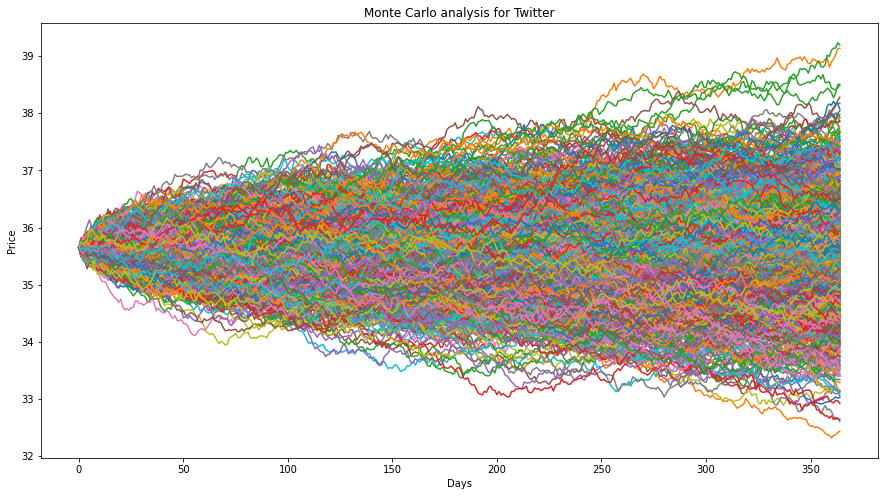

In [31]:
start_price = 35.65
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['TWTR'], sigma['TWTR'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Twitter')


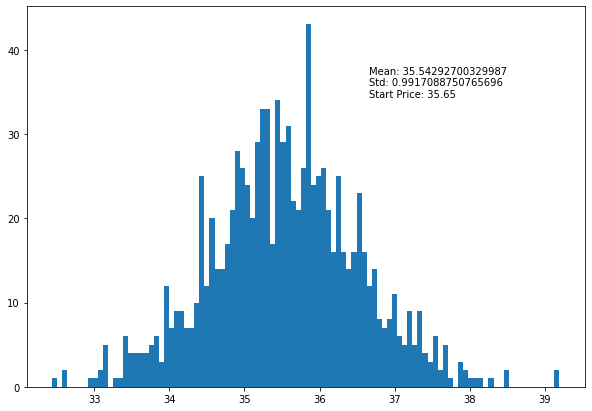

In [32]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Start price was 35.65, mean final price is 35.59. As we can see, final price is lower then start. Although the variance is small

### Tesla

In [33]:
TSLA.tail()

,High,Low,Open,Close,Volume,Adj Close,MA: 10,MA: 20,MA: 30,Daily Returns
Date,,,,,,,,,,
2022-02-02,931.500000,889.409973,928.179993,905.659973,22264300,905.659973,917.505994,984.545496,1015.013326,-0.027479
2022-02-03,937.000000,880.520020,882.000000,891.140015,26285200,891.140015,906.992993,974.696497,1013.433659,-0.016032
2022-02-04,936.500000,881.169983,897.219971,923.320007,24472600,923.320007,904.934991,967.627499,1010.581993,0.036111
2022-02-07,947.770020,902.710022,923.789978,907.340027,20271200,907.340027,902.668994,961.646503,1005.259993,-0.017307
2022-02-08,921.893677,894.809998,905.530029,915.654480,9189013,915.654480,902.394440,954.523227,999.317145,0.009164


Text(0.5, 1.0, 'Monte Carlo analysis for Tesla')

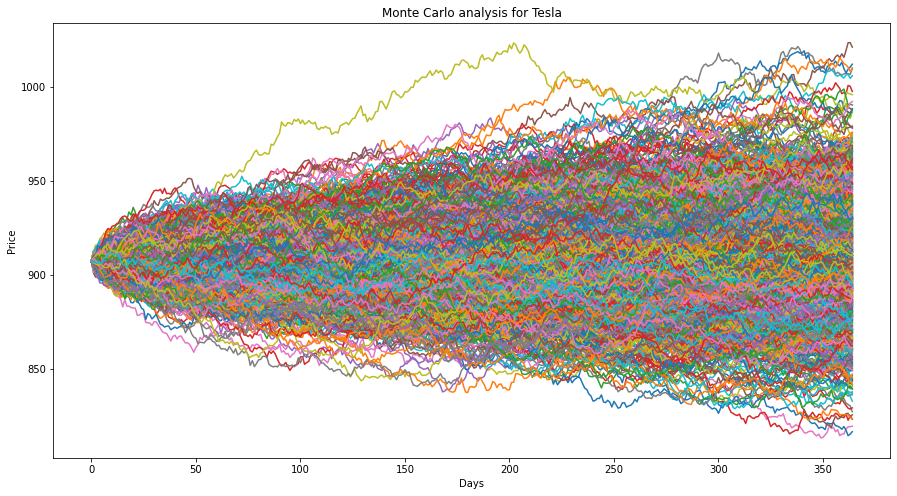

In [34]:
start_price = 907.34
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['TSLA'], sigma['TSLA'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Tesla')


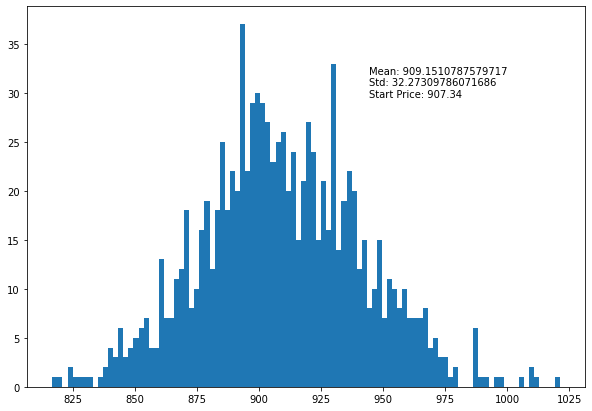

In [35]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

This time it turned out that the final price is more than the initial one. But the variance turned out to be very high. Stocks are considered risky.

### Microsoft

In [36]:
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close,MA: 10,MA: 20,MA: 30,Daily Returns
Date,,,,,,,,,,
2022-02-02,315.119995,308.880005,309.630005,313.459991,36636000.0,313.459991,302.050000,306.664999,316.451002,0.015222
2022-02-03,311.230011,299.959991,309.489990,301.250000,43730000.0,301.250000,302.014999,305.908499,315.583002,-0.038952
2022-02-04,308.799988,299.970001,300.209991,305.940002,35070300.0,305.940002,303.006000,305.511499,314.674335,0.015568
2022-02-07,307.839996,299.899994,306.170013,300.950012,28486200.0,300.950012,303.464001,304.856999,313.549668,-0.016310
2022-02-08,305.124207,299.950012,301.250000,304.024994,11748980.0,304.024994,305.017502,304.344749,312.268834,0.010218


Text(0.5, 1.0, 'Monte Carlo analysis for Microsoft')

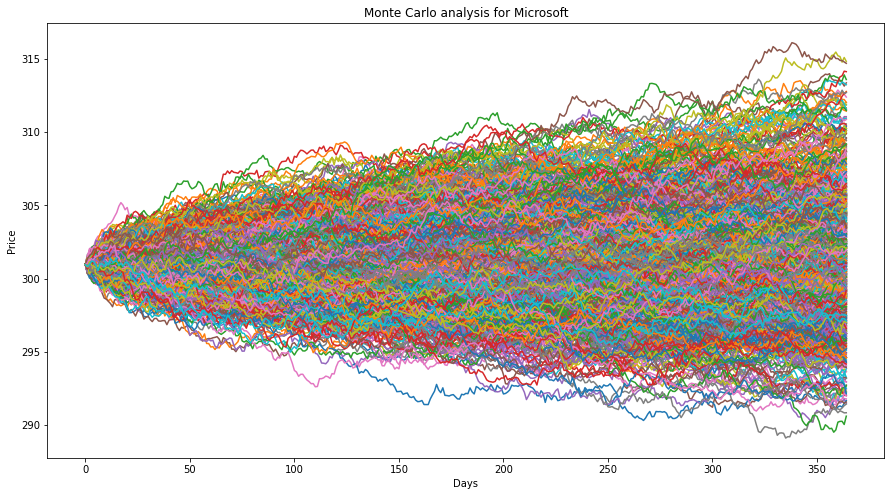

In [37]:
start_price = 300.95
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['MSFT'], sigma['MSFT'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Microsoft')

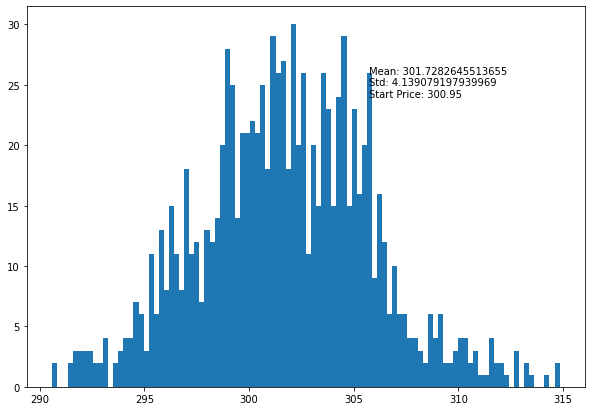

In [38]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

The stock looks stable. The final price is more than the initial one. The variance is relatively small

### Amazon

In [39]:
AMZN.tail()

,High,Low,Open,Close,Volume,Adj Close,MA: 10,MA: 20,MA: 30,Daily Returns
Date,,,,,,,,,,
2022-02-02,3101.500000,2977.270020,3101.010010,3012.250000,4366500,3012.250000,2905.416016,3073.496509,3179.225675,-0.003843
2022-02-03,2884.949951,2766.659912,2834.750000,2776.909912,11276600,2776.909912,2879.771997,3047.985010,3158.178003,-0.078128
2022-02-04,3224.000000,3012.159912,3112.129883,3152.790039,12640500,3152.790039,2909.764990,3042.370508,3149.246338,0.135359
2022-02-07,3253.820068,3145.000000,3170.399902,3158.709961,5124100,3158.709961,2936.547998,3037.752002,3140.490999,0.001878
2022-02-08,3186.260010,3111.010010,3135.010010,3180.159912,1647539,3180.159912,2974.591992,3035.273999,3133.383333,0.006791


Text(0.5, 1.0, 'Monte Carlo analysis for Amazon')

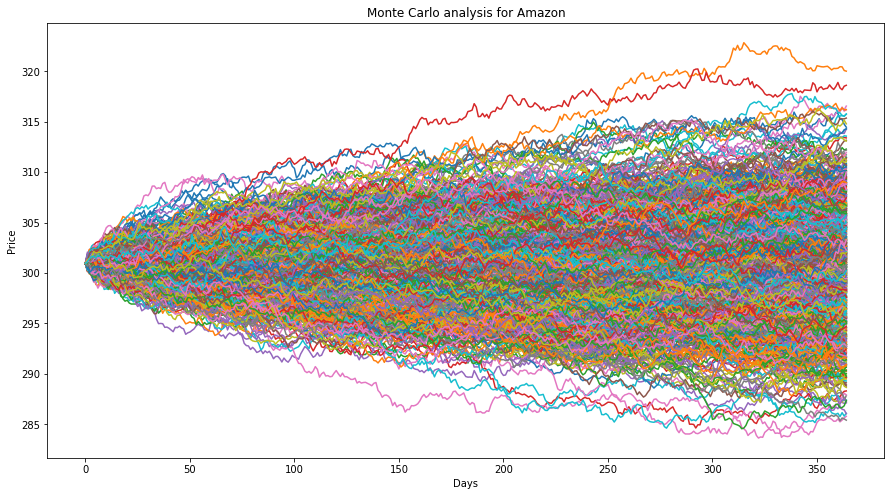

In [40]:
start_price = 300.95
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['AMZN'], sigma['AMZN'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Amazon')

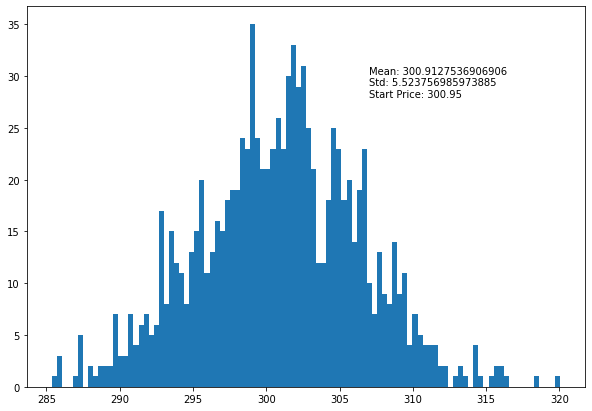

In [41]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

The initial and final price are almost the same. The variance is normal. Stocks look stable.